![title](bigbang-logo-dark-small.png)

# CLBE BigBang Tutorial

Many Standards Development Organizations have working groups that organize themselves through mailing lists. This mailing list data is a valuable source of research insights but can be challenging to gather and analyze. BigBang is an open source toolkit for studying processes of open collaboration and deliberation via analysis of the communications records. Its tools for collecting, analyzing, and visualizing mailing list data are used by a community of information policy researchers to study participation trends and interaction in these settings. This tutorial is a hands-on introduction to the toolkit’s capabilities.


## Three things BigBang Does

- **Ingress**. Tools for collecting data from SDOs, especially their mailing lists.
- **Analysis**. Tools for (pre)processing the data to produce useful insights.
- **Usability/Visualization**. Tools for visualizing and interacting with data. _(Big plans here!)_


## Institutional Collaboration

BigBang has been developed by a growing team of researchers spread across many universities and institutions, including UC Berkeley, University of Amsterdam, and New York University. Its development has been funded by Article 19 and Germany's Prototype Fund.

In addition to its scholarly use, BigBang has been building relationships with SDOs themselves. In 2021, the Internet Architecture Board hosted a workshop on Analyzing IETF Data, in which BigBang was featured as a tool for IAB to develop insights into internet governance.


### BigBang as Research Software

BigBing is research software -- written by scholars for our research purposes. 

It is part of Scientific Python ecosystem, drawing on many other open source scientific software libraries, such as NumPy, Matplotlib, Pandas. BigBang makes use of Jupyter notebooks, such as this one.

BigBang is a reflexive process. Several of the core developers are also qualitative scholars of socio-technical systems and institutions. Researchers commonly combine BigBang with participant observation in the SDOs they are studying. BigBang is governed by a steering committee of its core developers.

We welcome participation in our project at any level. It is currently transitioning from Stage 2 to Stage 3 of Benthall's [research software stage taxonomy](https://urssi.us/blog/2019/02/25/software-incubator-workshop-a-synthesis/). We are trying to do better at supporting "users", but if you are interested in using BigBang for your research, we highly encourage you to participate in our community so we can give you direct assistance.

### How to Participate

- Documentation website: https://bigbang-py.readthedocs.io/en/latest/
  - The most polished overview of the software and its functionality to date
- GitHub: https://github.com/datactive/bigbang
  - The issue tracker here is a good place to post problems you have with the software.
- Mailing list: https://lists.ghserv.net/mailman/listinfo/bigbang-dev
  - Open to all discussions of the software, including "Help me!" questions.
- Biweekly video call
  - Email us to ask about the details!

We are very interested in your feedback, always:
 - How do **you** think it should develop?
 - How can we lower the barriers to your using it?


## What do you want to get out of this?

What we could focus on:

 - See what BigBang can do
 - Learn how to run BigBang yourself
 - Understand our approach
 - Talk about standards and internet governance
 - Complain about how quants/software are ruining social science methods
 - How to merge tools, find data sources

## Installation

This tutorial assumes that you have Python 3 and Git installed on your system, and either `pip` or Anaconda.

We recommend installing BigBang from `git` source because that's how we do it.

Alternatively, you can [download the source code of the v0.4.0 Syzygy release](https://github.com/datactive/bigbang/releases/tag/v0.4.0).


### pip

```
git clone https://github.com/datactive/bigbang.git
# optionally create a new virtualenv here
pip3 install -r requirements.txt
python3 setup.py develop --user
```

If you choose not to use Anaconda, you may run into issues with versioning in Python.
If you run into these issues, you can try to alternative Anaconda based installation instructions below.

### conda

You can use Anaconda. This will also install the conda package management system, which you can use to complete installation.

Install Anaconda, with Python version 3.*.

Then begin a new conda environment and use the following commands:

```
git clone https://github.com/datactive/bigbang.git
cd bigbang
bash conda-setup.sh
python3 setup.py develop --user
```

### Jupyter notebooks and environments

Python is executed in an `environment`. During installation, you will have installed BigBang into either:
 - (a) your computer's 'global' python environment
 - (b) a 'virtual environment', using virtualenv
 - (c) a conda environment
 
To execute the cells of this Jupyter notebook, you will need to make sure the Jupyter kernel is running in the same environment that you installed BigBang into.

If you do not see the environment in which you installed BigBang in the dropdown menu at `Kernel > Change kernel`, then please follow [these instructions](https://ipython.readthedocs.io/en/stable/install/kernel_install.html) for installing `ipykernel` in your chosen environment.

## Using this notebook

Pressing `Shift + Enter` with a cell selected executes the cell.

There are two types of cells.
 - Markdown cells (like this one) are written in Markdown and render to formatted text when ran.
 - Code cells are written in Python. Executing the cell executes the code and returns the output of the last line.

In the top menu, `Kernel > Restart & Run All` restarts the kernel and executes all of the cells.

Execute this cell to import a number of libraries (including BigBang) into the kernel memory.

In [1]:
from bigbang.archive import Archive
import bigbang.parse as parse
from bigbang.analysis.utils import extract_domain
import bigbang.analysis.graph as graph
import bigbang.ingress.mailman as mailman
import bigbang.analysis.process as process
from datetime import date
import networkx as nx
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
import pytz
import seaborn as sns

## Data Ingress

BigBang aims to make streamline the process of collecting data from SDOs.

Its most robust tools are built for collecting and process email records.

We will also demonstrate how data from other sources can be integrated into an analysis.

In the future, we hope to support gathering of other data, such as data from GitHub projects and Discourse forums.

### Email

Many SDOs use mailing lists to support internal discussion by their working groups.
For example:

 - Internet Engineering Task Force (IETF)
 - World Wide Web Consortium (W3C)
 - Internet Corporation for Assigned Names and Numbers (ICANN)
 - 3rd Generation Partnership Project (3GPP)

Generally speaking, each working group is assigned its own mailing list, which is archived on the web.

Because email is itself a standard communication protocol, we can build standardized tools for collecting, processing, and visualizing this data.

Email data is stored for analysis in the `archives/` directory, in the directory of your BigBang installation.

#### Data drive

I've preprocessed archives of many IETF mailing lists and put them in this [Drive folder](https://drive.google.com/drive/folders/14l2IyRJMrM6lhhlpyJRHY5KkpX8rppdI?usp=sharing).

Download the CSV files for the working groups that interest you and put them in the `archives/` directory.

This notebook has been designed with mailing lists `dtn-security`, `tls-reg-review`, `httpbisa`, `v6ops`.

#### Command line tools

Other mailing lists can be gathered from the web using the following commands.

(`!` in a notebook cell tells the notebook to run the follow command in the _shell_, rather than in Python.)

In [2]:
#!python bin/collect_mail.py -u https://www.ietf.org/mail-archive/text/v6ops/
#!python bin/collect_mail.py -u https://www.ietf.org/mail-archive/text/dtn-security/
#!python bin/collect_mail.py -u https://www.ietf.org/mail-archive/text/tls-reg-review/

### IETF Datatracker

One way to get original research results is to combine data from different sources.

IETF makes many other records besides its mailing lists available for inspection via a tool called the [IETF DataTracker](https://datatracker.ietf.org/).

BigBang integrates well with `ietfdata`, the Python wrapper for this data tracker developed by the University of Glasgow. You can find more information about `ietfdata` on [Github](https://github.com/glasgow-ipl/ietfdata).


### Ancillary Data

In addition to these data sources, BigBang comes with hand-curated data sets that have proven useful for data cleaning and research.

We discuss one of these datasets in the Organizations section, below.


## Analysis Tools

Now for the fun part! We can load some of the archives into Python and visualize some data!

The code below looks up data for working groups by name from the `archives/` directory and loads it into a Python object representation, and `Archive`.

In [3]:
mls = ["dtn-security", "tls-reg-review", "httpbisa", "v6ops"]

arxs = [Archive(ml) for ml in mls]

### Activity

By 'activity' we mean simply the number of emails sent to the mailing list over time, and by whom.

BigBang makes it easy to derive a record of activity counts from an email archive.

In [4]:
acts = [arx.get_activity() for arx in arxs]

We can then plot the rolling average of activity on each mailing list over time.

<AxesSubplot:xlabel='Date'>

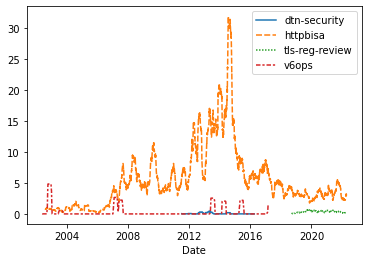

In [5]:
sum_acts = pd.DataFrame.from_records({mls[i] : a.sum(1) for i,a in enumerate(acts)})
sum_acts.index = sum_acts.index.map(date.fromordinal)
window = 100

sns.lineplot(data=sum_acts.rolling(window).mean().dropna(how='all'))

The activity matrix is broken down by email sender. So we can manipulate the matrix and find the top senders over all time.

In [6]:
acts[1].sum().sort_values(ascending=False)[:15]

From
"Salz, Rich" <rsalz@akamai.com>                                     124.0
Yoav Nir <ynir.ietf@gmail.com>                                       79.0
Benjamin Kaduk <kaduk@mit.edu>                                       28.0
"Christopher Wood" <caw@heapingbits.net>                             18.0
Nick Sullivan <nick@cloudflare.com>                                  16.0
"Sabrina Tanamal via RT" <drafts-expert-review-comment@iana.org>     14.0
"Amanda Baber via RT" <iana-prot-param@iana.org>                     13.0
Sean Turner <sean@sn3rd.com>                                         12.0
"Amanda Baber via RT" <drafts-expert-review-comment@iana.org>        11.0
"Amanda Baber via RT" <iana-prot-param-comment@iana.org>             11.0
"Sabrina Tanamal via RT" <iana-prot-param@iana.org>                   9.0
Paul Yang <kaishen.yy@antfin.com>                                     8.0
"Olle E. Johansson" <oej@edvina.net>                                  7.0
Wang Haiguang <wang.haiguang.shie

Each activity matrix is a Pandas `DataFrame`, which supports a number of database-like operations.

Notice that in some cases the same person is indentified in by multiple different strings. This is extremely common, and BigBang contains some entity resolutions tools for combining these records.

One way to approach this problem is to aggregate messages by email domain. In this case, that would group all `@iana.org` messages together. We will see how this works later in this notebook.

### Word Trends

The body of a mailing list is most often text in natural language.

This means the data affords analysis using Natural Language Processing (NLP techniques.

In this section of the tutorial, we will use a very simple NLP technique -- counting the number of appearances of a word.

To do this, we will need to install some additional data associated with the the Python Natural Language ToolKit `nltk`.

In [7]:
### Maybe move this into a module loaded as a script to get it out of the way.

import nltk
nltk.download('punkt')

from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()

import re
def count_word(text, word, stem = False):
    if not text:
        return 0
    
    if len(word.split(" ")) <= 1:
        ## normalize the text - remove apostrophe and punctuation, lower case
        normalized_text = re.sub(r'[^\w]', ' ',text.replace("'","")).lower()
    
        tokenized_text = nltk.tokenize.word_tokenize(normalized_text)

        if stem:
            tokenized_text = [st.stem(t) for t in tokenized_text]
    
        return tokenized_text.count(word)
    else:
        return text.lower().count(word)

[nltk_data] Downloading package punkt to /home/sb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Let's pick a few significant words for analysis.

In [8]:
checkwords = ["security", "privacy", "header"]

In [9]:
arx_word_data = {}

In [10]:
for i, arx in enumerate(arxs):
    data = arx.data.copy()
    dates = data['Date'].map(lambda x: x.date())
    data['Date'] = dates
    
    for word in checkwords:
        data[word] = data['Body'].apply(lambda x: count_word(x,word))
        
        arx_word_data[f"{mls[i]} {word}"] = data.groupby('Date')[word].sum()

word_data = pd.DataFrame(arx_word_data)

In [11]:
new_date_range = pd.date_range(start=word_data.index.min(), end=word_data.index.max(), freq="D")
word_data = word_data.reindex(new_date_range, fill_value=0)  
word_data = word_data.fillna(0)

<AxesSubplot:>

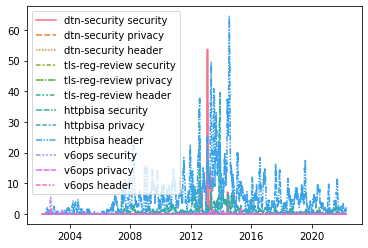

In [22]:
window = 30

sns.lineplot(data=word_data.rolling(window).mean().dropna(how='all'))

This plot is pretty messy! Can you clean it up?

 - You can change the mailing lists being plotting by changing the value of `mls` in cell `[3]`.
 - Can you figure out how to normalize the word counts by the activity counts? This may require some Python skills. If you can't do it, try asking your neighbor.

## Interactions

Email messages are always 'From' somebody. In a mailing list, they are always 'To' the mailing list itself -- all subscribers recieve the email. But some emails are 'In-Reply-To' other emails.

We define an 'interaction graph' in terms of these replies.

Consider a network with nodes representing all people who have sent emails to the mailing list.

We create an edge from A to B if A replies to an email from B. We weight the edge by the number of times A replies to B. 

We are providing a method for visualizing these graphs. Note that we only include nodes for people who have sent a number of messages over a threshold (15% of the maximum number of messages sent by anybody to the list). That makes the visualizations much cleaner!

In [13]:
def draw_interaction_graph(ig, threshold = .15):
    ig = ig.copy()
    max_sent = max([data['sent'] for name,data in ig.nodes(data=True)])
    ig.remove_nodes_from([name for name,data in ig.nodes(data=True) if data['sent'] < threshold * max_sent])
    
    edges, weights = zip(*nx.get_edge_attributes(ig, 'weight').items())
    weights_multiplier = 50.0 / max(weights)
    weights = [w * weights_multiplier for w in weights]

    pos = nx.shell_layout(ig)
    
    node_size_multiplier = 1000 / max([data['sent'] for name,data in ig.nodes(data=True)])
    node_size = [data['sent'] * node_size_multiplier for name,data in ig.nodes(data=True)]

    nx.draw(
        ig,
        pos,
        with_labels=False,
        node_size = node_size,
        node_color = '#CCCCFF',
        alpha = 0.8,
        font_size=12,
        #font_weight='bold',
        edgelist=edges,
        width=weights,
        edge_color=weights,
        edge_cmap=plt.cm.viridis,
    )
    
    # some math labels
    labels = {node : str(node)[:15]for node in ig.nodes}
    nx.draw_networkx_labels(ig, pos, labels, font_size=12)


You can change the way the visualization looks by altering the values in the `draw_interaction_graph` function.

Next, we will use this function to plot the mailing lists.

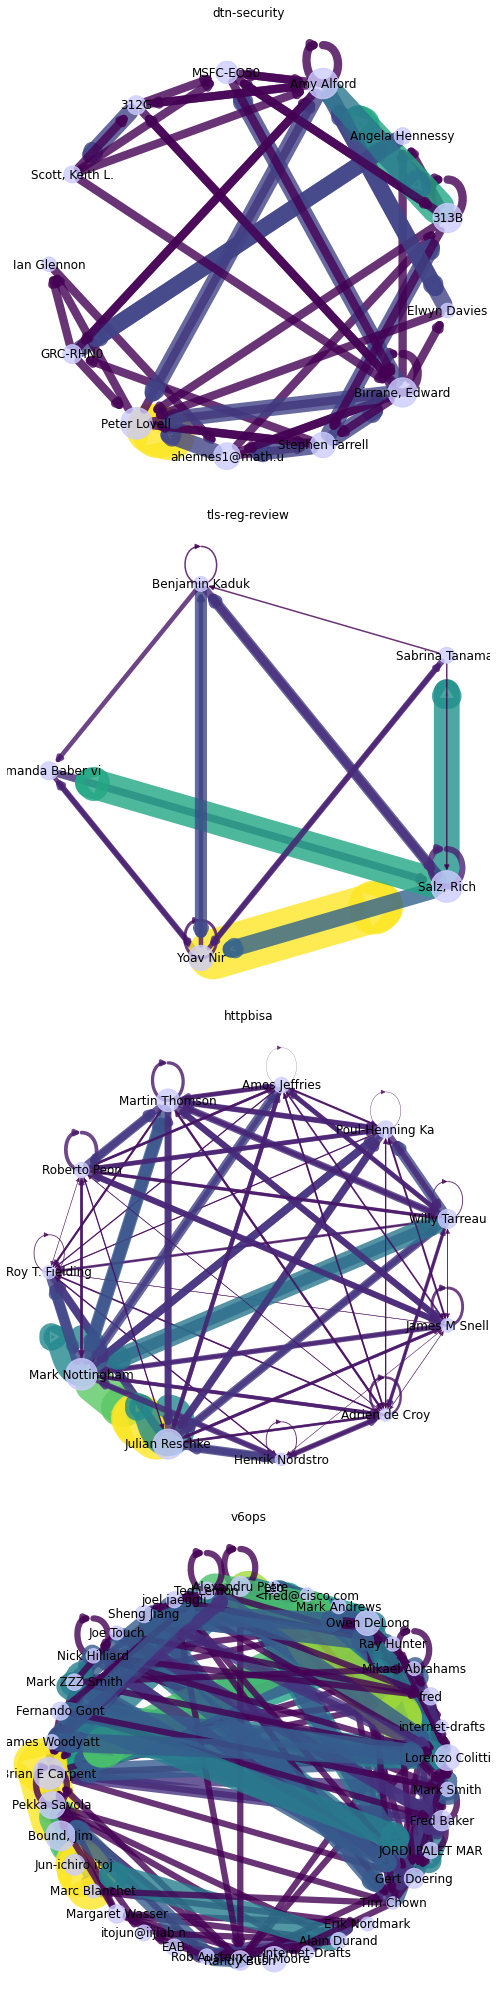

In [14]:
figdim = len(arxs) * 100 + 10
    
plt.figure(figdim,figsize=(7, 28))
for i,arx in enumerate(arxs):
    plt.subplot(figdim + i + 1) # create a subplot keyed to the index of this ml
    plt.title(mls[i])
    df = arx.data.copy()
    ig = graph.messages_to_interaction_graph(df)
    draw_interaction_graph(ig)

plt.tight_layout()
plt.show()

### Email domains

Many researchers aren't as interested in the individual participants in an SDO working group as they are in which organizations are involved.

Matching emails to organization of origin is a complex task, but a relatively simple first step is to aggregate the emails by the email **domain**. For example, the email address **abc123@nyu.edu** has the domain **nyu.edu**, which indicates that the email comes from a particular university.

In the plots below, how many of the email domains do you recognize?

Are there any surprises?

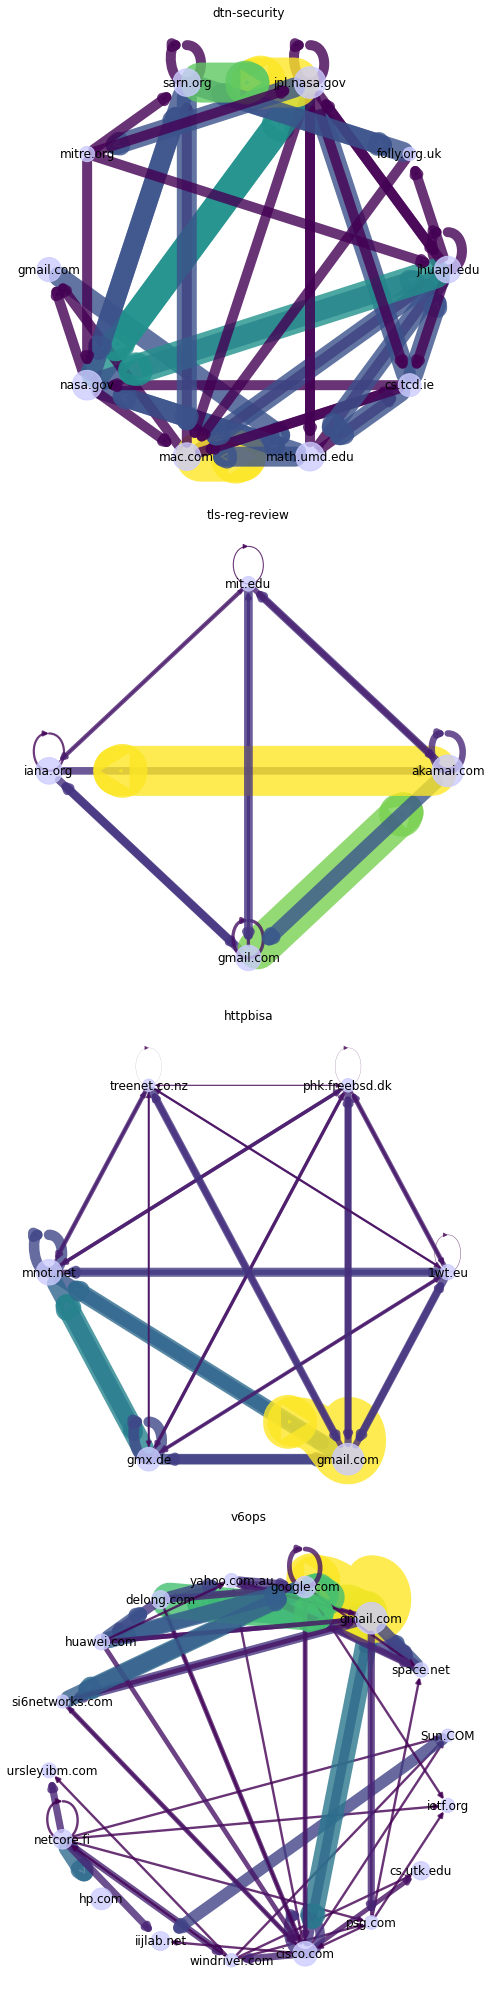

In [15]:
figdim = len(arxs) * 100 + 10
    
plt.figure(figdim,figsize=(7, 28))
for i,arx in enumerate(arxs):
    plt.subplot(figdim + i + 1) # create a subplot keyed to the index of this ml
    plt.title(mls[i])
    df = arx.data.copy()
    
    ## could make this cleaner -- move more to the library
    df['domain'] = df['From'].map(extract_domain)
    df['From'] = df['domain']
    df = df.dropna(subset='From')
    
    ig = graph.messages_to_interaction_graph(df, clean = False)
    draw_interaction_graph(ig)

plt.tight_layout()
plt.show()

### Organizations

We have been building a database of Organization metadata.

This would, among other things, allow us to match emails with there organization of origin through, for example, the email domain.

We show the current state of the data, and how to access it, below.

In [16]:
import bigbang.datasets.organizations as organizations
org_data = organizations.load_data()

In [17]:
org_data.head()

,name,category,subsidiary of / alias of,stakeholdergroup,nationality,email domain names,Membership Organization,Wiki Page
0,Universidad Tecnológica Nacional,Research Institution,NaN,Academia,Argentina,NaN,NaN,NaN
1,Attorney-General's Department Australian Gove...,NaN,NaN,Government,Australia,NaN,ETSI,NaN
2,COMMUNICATIONS ALLIANCE LTD,Association,NaN,Business,Australia,NaN,OTHER,NaN
3,Softel Systems Pty Ltd,Cybersecurity,NaN,Business,Australia,softelsystems.com.au,ETSI,NaN
4,Telstra Corporation Limited,Telecommunications Provider,NaN,Business,Australia,team.telstra.com,ETSI,NaN


### Gender

Many researchers are interested in the gender composition of SDO working groups.

We have integrated a Python library for detecting gender based on people's first names -- [gender-detector](https://pypi.org/project/gender-detector/).

While the merits of this method of determining participant gender are subject to a great deal of debate, we demonstrate below how to conduct a preliminery analysis of gender participation in mailing lists.

In [18]:
from gender_detector import gender_detector as gd

The detector will try to determine if a name is **male** or **female** based on census records. If the detection database does not contain the queried name, we will say the name is unknown -- **n-unknown**. If the name is too ambiguously gendered to make a definitive call, we will say the name is **g-unknown**.

In [19]:
detector = gd.GenderDetector('us')

gender_ambiguous_names = {}

def guess_gender(name):
    if not name:
        return 'n-unknown'
    try:
        if detector.guess(name) == 'unknown':
            return 'g-unknown'
        
        return detector.guess(name)
    except:
        return 'error'

series = []  
for i, arx in enumerate(arxs):
    activity = Archive.get_activity(arx).sum(0)
    activityFrame = pd.DataFrame(activity, columns=['Message Count'])
    
    activityFrame['Name'] = activityFrame.index.map(lambda x: parse.clean_from(x))    
    activityFrame['First Name'] = activityFrame['Name'].map(lambda x: parse.guess_first_name(x))
    activityFrame['Guessed Gender'] = activityFrame['First Name'].map(guess_gender)
    
    counts = activityFrame.groupby('Guessed Gender')['Message Count'].count()
    counts['name'] =mls[i]
    series.append(counts)

gender_data = pd.DataFrame.from_records(series, index = 'name').transpose()

In [20]:
gender_data

name,dtn-security,tls-reg-review,httpbisa,v6ops
Guessed Gender,,,,
female,2.0,3.0,61.0,95.0
g-unknown,3.0,3.0,414.0,153.0
male,9.0,35.0,864.0,191.0
n-unknown,15.0,25.0,398.0,193.0
error,NaN,2.0,7.0,NaN


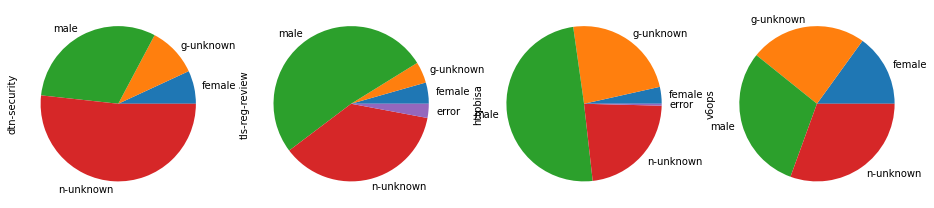

In [21]:
figure, axes = plt.subplots(ncols=len(arxs), figsize=(16,4))

for i, arx in enumerate(arxs):
    # plt.subplot(figdim + i + 1) # create a subplot keyed to the index of this ml
    gender_data.plot(kind='pie', y=mls[i], ax = axes[i])
    axes[i].get_legend().remove()

## What's next?

BigBang comes with many more notebooks, like this one, demonstrating other ways to use it.

These are in the `examples/` directory where you installed BigBang.

You can also experiment with modifying the scripts in this notebook to find other insights.

Because all the software used is open source, it is easy to look up how any particular software package, such as Matplotlib or Pandas, works -- just Google it!

You can also think about how to operationalize a research question using BigBang. If you have completed the tutorial materials in this notebook, feel free to ask about your research interest in the workshop!